Bird Dataset: https://www.kaggle.com/datasets/gpiosenka/100-bird-species


## **IMPORTING THE LIBRARIES**

1. cv2 to use computer vision fundamentals in out project.
2. numpy offers comprehensive mathematical functions that can be used in the project.
3. In google colab the notebook often crashes if we use imshow to display images. So we have to import it from "google.colab.patches".
4. matplotlib to perform plotings and any visual analysis if required.
5. "%matplotlib inline" is like a magical statement. This creates a png image of the figure and outputs the image in the display.

In [217]:
# LIBRARIES
import cv2
import random
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
from random import randrange, getrandbits

In [218]:
# PATHS AND DIRECTORIES
path = '/content/drive/MyDrive/CAPSTONE/Project/RSA Algorithm/'
name = '1'
extension = '.png'

## **THE ORIGINAL IMAGE**

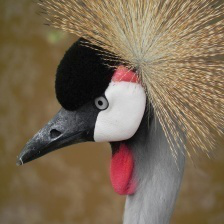

In [219]:
# VISUALISING THE ORIGINAL IMAGE
original_image = cv2.imread(path+name+extension)
cv2_imshow(original_image)

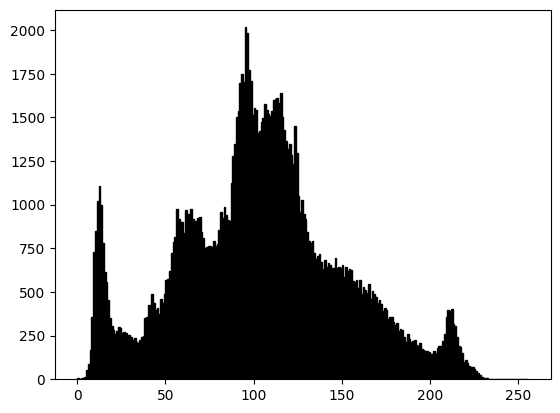

In [220]:
# Histogram of Original Image
plt.hist(original_image.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

## **THE RSA ALGORITHM**

RSA algorithm is an asymmetric cryptography algorithm. Asymmetric actually means that it works on two different keys i.e. Public Key and Private Key. As the name describes that the Public Key is given to everyone and the Private key is kept private.

The idea of RSA is based on the fact that it is difficult to factorize a large integer. The public key consists of two numbers where one number is a multiplication of two large prime numbers. And private key is also derived from the same two prime numbers. So if somebody can factorize the large number, the private key is compromised. Therefore encryption strength totally lies on the key size and if we double or triple the key size, the strength of encryption increases exponentially. RSA keys can be typically 1024 or 2048 bits long, but experts believe that 1024-bit keys could be broken in the near future. But till now it seems to be an infeasible task.

We will now perform the RSA on a random image step by step and see the results we obtain:

## **FUNCTIONS IMPLEMENTING RSA ALGORITHM**

In [221]:
# Function to get image matrix
def getImageMatrix_gray(imageName):
    im = Image.open(imageName, mode='r').convert('LA')
    color=1
    pix = im.load()
    image_size = im.size 
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size, color

In [222]:
# Function to get Power
def power(a,d,n):
  ans=1;
  while d!=0:
    if d%2==1:
      ans = ((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans;

In [223]:
# Function for Miller Rabin Primality Test
def MillerRabinPrimalityTest(N,d):
  a = randrange(2,N-1)
  x = power(a,d,N);
  if x==1 or x==N-1:
    return True;
  else:
    while(d!=N-1):
      x=((x%N)*(x%N))%N;
      if x==1:
        return False;
      if x==N-1:
        return True;
      d<<=1;
  return False;

In [224]:
# Checking whether the number is Prime
def is_prime(N,K):
  if N==3 or N==2:
    return True;
  if N<=1 or N%2==0:
    return False;
  
  #Find d such that d*(2^r)=X-1
  d=N-1
  while d%2!=0:
    d/=2;

  for _ in range(K):
    if not MillerRabinPrimalityTest(N,d):
      return False;
  return True; 

In [225]:
# Function for Generating Prime Candidate
def generate_prime_candidate(length):
  p = getrandbits(length)
  """Now we will apply a mask to set MSB and LSB to 1.
     We are making the MSB 1 to ensure a number of 1024 bits.
     We are making the LSB 1 to ensure that the number is odd."""
  p|=(1<<length-1)|1
  return p;

In [226]:
# Function to Generate The Prime Numbers
def generate_prime_number(length):
  A=4
  while not is_prime(A,128):
      A = generate_prime_candidate(length)
  return A

length=5
P=generate_prime_number(length)
Q=generate_prime_number(length)

P,Q

(31, 17)

## **THE MATHEMATICS OF RSA**


In [227]:
# EULER TOTIENT
N=P*Q
eulerTotient=(P-1)*(Q-1)
N,eulerTotient

(527, 480)

In [228]:
# FIND E WHERE GCD(E, EULER TOTIENT) = 1
def GCD(a,b):
  if a==0:
    return b;
  return GCD(b%a,a)

E=generate_prime_number(4)
while GCD(E,eulerTotient)!=1:
  E=generate_prime_number(4)
print(E)

11


In [229]:
# Find D such that (DxE)mod(eulerTotient) = 1. For this we will use the Extended Euclidean Algorithm.
def extended_euclidean_algo(E,eulerTotient):
  a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,E

  while d2!=1:
      k=(d1//d2)            # finding k

      temp=a2
      a2=a1-(a2*k)
      a1=temp               # finding a

      temp=b2
      b2=b1-(b2*k)  
      b1=temp               # finding b

      temp=d2
      d2=d1-(d2*k)
      d1=temp               # finding d

      D=b2

  if D>eulerTotient:
    D=D%eulerTotient
  elif D<0:
    D=D+eulerTotient

  return D


D=extended_euclidean_algo(E, eulerTotient)
D

131

In [230]:
row,col = original_image.shape[0],original_image.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]

## **ENCRYPTION**

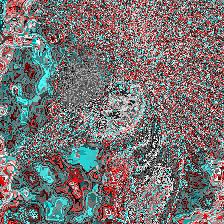

In [231]:
# ENCRYPTING THE ORIGINAL IMAGE
for i in range(0,row):
  for j in range(0, col):
    r,g,b=original_image[i,j]
    C1 = power(r,E,N)
    C2 = power(g,E,N)
    C3 = power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C1%256
    C3=C3%256
    original_image[i,j]=[C1,C2,C3]

cv2_imshow(original_image)

data=Image.fromarray(original_image)
data.save(path+"Encrypted_"+name+extension)

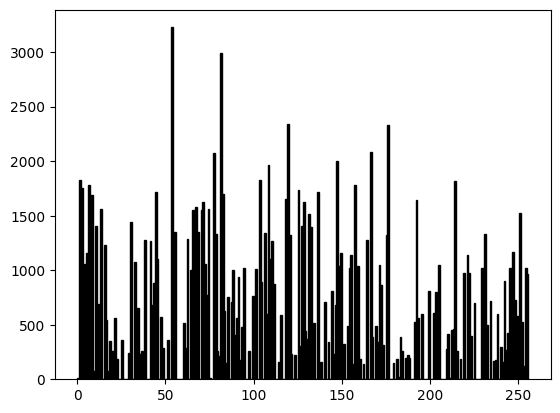

In [232]:
# HISTOGRAM OF ENCRYPTED IMAGE
plt.hist(original_image.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

## **DECRYPTION**

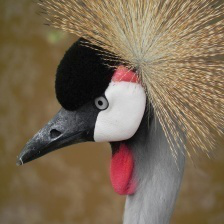

In [233]:
# DECRYPTING THE ENCRYPTED IMAGE
for i in range(0,row):
  for j in range(0,col):
    r,g,b=enc[i][j]
    M1=power(r,D,N)%256
    M2=power(g,D,N)%256
    M3=power(b,D,N)%256
    
    original_image[i,j]=[M1,M2,M3]
  
cv2_imshow(original_image)

data=Image.fromarray(original_image)
data.save(path+"Decrypted_"+name+extension)

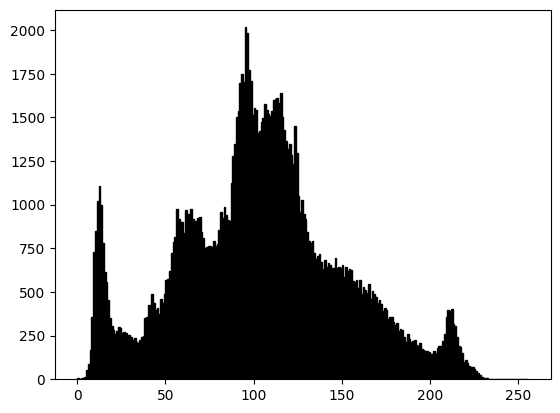

In [234]:
# Histogram of the decrypted image
plt.hist(original_image.ravel(), bins=256, range=(0.0, 256.0), fc='k', ec='k');

## **ADJACENT PIXEL CORRELATION**

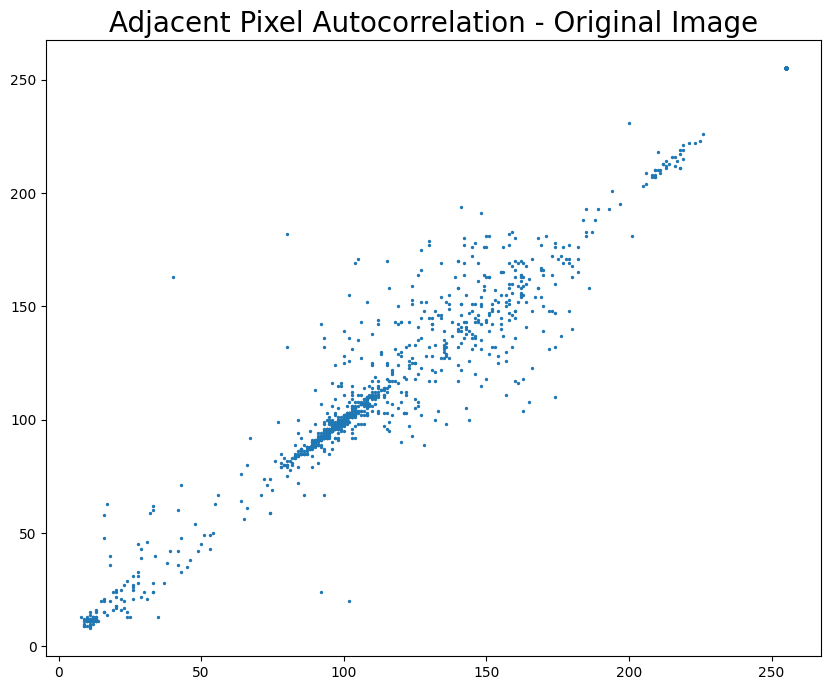

In [235]:
# Original Image
ImageMatrix,image_size,color = getImageMatrix_gray(path+name+extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size[0]-2)
  y = random.randint(0,image_size[1]-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()

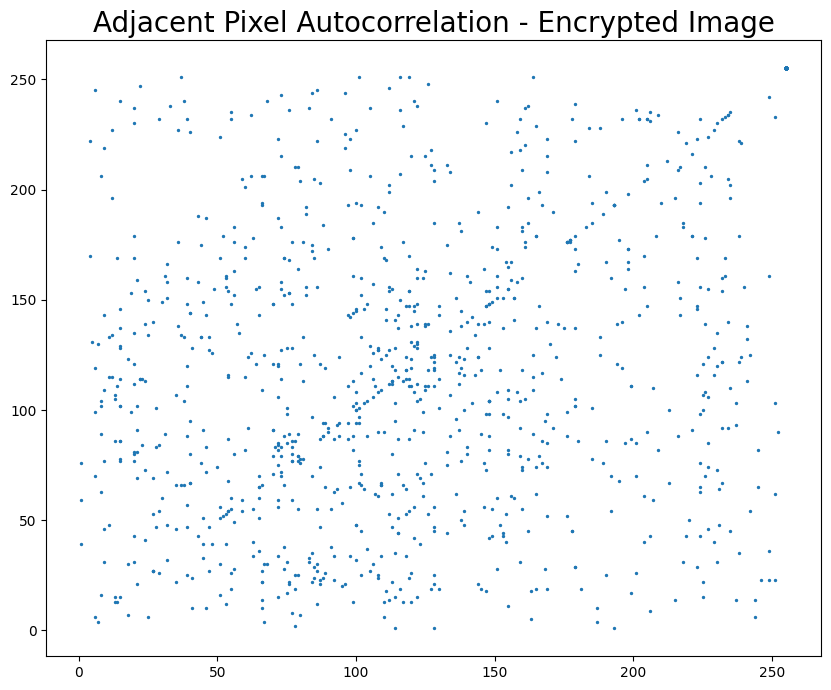

In [236]:
# Encrypted Image
ImageMatrix,image_size,color = getImageMatrix_gray(path+"Encrypted_"+name+extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size[0]-2)
  y = random.randint(0,image_size[1]-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Encrypted Image', fontsize=20)
plt.show()

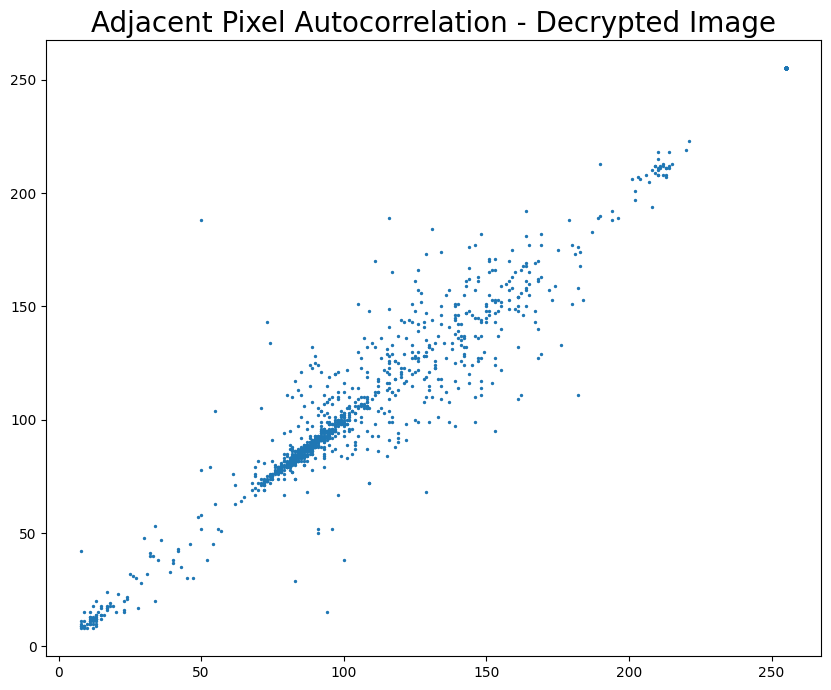

In [237]:
# Decrypted Image
ImageMatrix,image_size,color = getImageMatrix_gray(path+"Decrypted_"+name+extension)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size[0]-2)
  y = random.randint(0,image_size[1]-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Decrypted Image', fontsize=20)
plt.show()

## **CALCULATING THE CORRELATION COEFFICIENT**

In [238]:
from numpy import asarray

In [239]:
original_image_array = cv2.imread(path + name + extension)
original_image_array = asarray(original_image_array)
original_image_array = original_image_array.reshape(-1)

In [240]:
encrypted_image_array = cv2.imread(path + "Encrypted_" + name + extension)
encrypted_image_array = asarray(encrypted_image_array)
encrypted_image_array = encrypted_image_array.reshape(-1)

In [241]:
decrypted_image_array = cv2.imread(path + "Decrypted_" + name + extension)
decrypted_image_array = asarray(decrypted_image_array)
decrypted_image_array = decrypted_image_array.reshape(-1)

In [242]:
# Original vs Encrypted Correlation coefficient
np.corrcoef(original_image_array, encrypted_image_array)

array([[1.        , 0.07325748],
       [0.07325748, 1.        ]])

In [243]:
# Original vs Decrypted Correlation coefficient
np.corrcoef(original_image_array, decrypted_image_array)

array([[1.        , 0.66186393],
       [0.66186393, 1.        ]])